# Our goal is to analyze the sentiments of the recent tweets and how people feel about vaccination. 
# Display some data visualizations and data summary.
# Then we will use Naive Bayes/Regression Tree and Logistic Regression to build a model to predict the sentiment of a text.
# Finally we will use Lime and Eli5 to explain some sample tweets.

In [1]:
import pandas as pd
df = pd.read_csv("vaccination_all_tweets.csv")
df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.418860e+18,Gulistan News,Jammu And Kashmir,Gulistan News is the satellite News Channel wh...,7/6/2018 5:33,13446,4,1098,False,7/24/2021 9:09,AIIMS to start trial of 2nd covaxin dose on ki...,"['covaxin', 'AIIMS', 'BharatBiotech', 'CovidVa...",Twitter Web App,0,0,False
1,1.418860e+18,Hatice AVCI ‘Deniz’,🇬🇧 via 🇧🇪 🇹🇷,emerging curation lead x product @twitter | jo...,3/30/2010 15:31,25903,40522,16448,True,7/24/2021 9:09,Side effects are rough. \n\n- No deep sleep \n...,['Moderna'],Twitter for iPhone,0,0,False
2,1.418860e+18,Xukki🌍,NaN,$OCGN 🌛\n\nNO financial Advice or Buy Recommen...,5/21/2020 15:54,293,34,2993,False,7/24/2021 9:04,Understand the 'important' parts of the text☝️...,"['FDA', 'WHO']",Twitter for Android,0,0,False
3,1.418860e+18,Arishna Neermul,"Johannesburg, South Africa","News Anchor, Lifestyle Journalist,\nNail Tech,...",1/11/2020 16:26,64,317,502,False,7/24/2021 9:04,Let's help ourselves understand how the vaccin...,NaN,Twitter for Android,0,0,False
4,1.418860e+18,Teena Thacker,Delhi,Journalist @EconomicTimes |#pharma| #health. A...,11/26/2013 14:23,22470,2118,34624,True,7/24/2021 9:02,And now Brazil has suspended the clinical tria...,['covaxin'],Twitter for iPhone,12,23,False
5,1.418860e+18,Aydin Djemal,Manc,CEO at BHA For Equality,4/28/2011 22:49,218,502,764,False,7/24/2021 9:01,the_BHA: Manchester 📢\n\nIf you require your ...,"['AstraZeneca', 'Moderna', 'Pfizer']",IFTTT,0,0,False
6,1.418860e+18,KKMs,"Bangkok, Thailand",If you don’t like me go ahead and pls mind onl...,3/26/2020 2:37,3,61,175,False,7/24/2021 9:01,Chinese fans should ban Thai Artists who deval...,"['Sinovac', 'Sinopharm', 'China']",Twitter for iPhone,0,0,False
7,1.418860e+18,BHA for Equality,Manchester,We protect good health by promoting the well-b...,11/3/2011 12:28,1968,1894,2490,False,7/24/2021 9:00,Manchester 📢\n\nIf you require your 1st or 2n...,"['AstraZeneca', 'Moderna', 'Pfizer']",Buffer,0,0,False
8,1.418860e+18,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,12,0,0,False,7/24/2021 9:00,45+ #BBMP #Bengaluru #CovidVaccine Availabilit...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,0,False
9,1.418860e+18,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,12,0,0,False,7/24/2021 9:00,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False


In [2]:
df.shape # Checking number of rows and columns

(145025, 16)

In [3]:
df.text[10] # Looking at some text sample

'FULLY #vaccinated #Texas #Democrats give #COVID #COVID19 to other FULLY #vaccinated people!\n\nJust tell this the… https://t.co/ThxHTsKKrZ'

In [4]:
df.text[11]


'Bharat Biotech to begin COVAXIN trial on 2-6 years age group next week @BharatBiotech #bharatbiotech… https://t.co/unuXBwzg9U'

In [5]:
df.text[12]

'Second dose done! 💪💉💪\nGotta big up the speed and efficiency they move you through the vaccine centre! 😷 In and out.… https://t.co/Dgv7QjDYox'

In [6]:
# We see that every text has a link starting with https -> will need to get rid of that later for text preprocessing

In [7]:
df.columns # Checking columns name

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [8]:
# remove if is_retweet = True
df.drop(df[df['is_retweet'] == 'True'].index)

C:\Users\ntnkh\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.418860e+18,Gulistan News,Jammu And Kashmir,Gulistan News is the satellite News Channel wh...,7/6/2018 5:33,13446,4,1098,False,7/24/2021 9:09,AIIMS to start trial of 2nd covaxin dose on ki...,"['covaxin', 'AIIMS', 'BharatBiotech', 'CovidVa...",Twitter Web App,0,0,False
1,1.418860e+18,Hatice AVCI ‘Deniz’,🇬🇧 via 🇧🇪 🇹🇷,emerging curation lead x product @twitter | jo...,3/30/2010 15:31,25903,40522,16448,True,7/24/2021 9:09,Side effects are rough. \n\n- No deep sleep \n...,['Moderna'],Twitter for iPhone,0,0,False
2,1.418860e+18,Xukki🌍,NaN,$OCGN 🌛\n\nNO financial Advice or Buy Recommen...,5/21/2020 15:54,293,34,2993,False,7/24/2021 9:04,Understand the 'important' parts of the text☝️...,"['FDA', 'WHO']",Twitter for Android,0,0,False
3,1.418860e+18,Arishna Neermul,"Johannesburg, South Africa","News Anchor, Lifestyle Journalist,\nNail Tech,...",1/11/2020 16:26,64,317,502,False,7/24/2021 9:04,Let's help ourselves understand how the vaccin...,NaN,Twitter for Android,0,0,False
4,1.418860e+18,Teena Thacker,Delhi,Journalist @EconomicTimes |#pharma| #health. A...,11/26/2013 14:23,22470,2118,34624,True,7/24/2021 9:02,And now Brazil has suspended the clinical tria...,['covaxin'],Twitter for iPhone,12,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145020,1.337730e+18,"Party politics isn't working for anyone, anywhere","Wales, United Kingdom",No lie to another is respectful; no lie to you...,8/3/2016 20:11,761,504,33675,False,12/12/2020 12:16,@mirekR9 @sputnikvaccine @AstraZeneca it's the...,['PfizerBioNTech'],Twitter Web App,0,0,False
145021,1.337730e+18,KHuntson,USA🇺🇸,"RN, health educator, writer, researcher, wife,...",1/31/2014 1:25,2035,1672,6734,False,12/12/2020 12:16,FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...,"['PfizerBioNTech', 'CovidVaccine']",Twitter Web App,0,0,False
145022,1.337730e+18,mystic,NaN,I believe in the goodness of humanity.,5/20/2020 10:57,14,162,1341,False,12/12/2020 12:12,#CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...,"['CovidVaccine', 'Pfizer', 'PfizerBioNTech', '...",Twitter for iPhone,0,1,False
145023,1.337730e+18,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",6/9/2009 13:53,66224,603,771,True,12/12/2020 11:59,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False


In [9]:
len(df) #len is equal to before dropping, which means that there is no tweet that is retweet??

145025

In [37]:
df.drop_duplicates(subset=['text'], inplace=True)  
len(df) # try to drop the duplicate text rows - now we have some duplicated text(which could also mean a retweet)

143373

In [38]:
# We will drop the uncessessary columns that we won't be using in this dataset
# and only retain certain columns to analyze: 'user_location', 'user_followers', 'text', 'source', and 'retweets'.
new_df = df[['user_location', 'user_followers', 'text', 'source', 'retweets']]
new_df.head()

,user_location,user_followers,text,source,retweets
0,Jammu And Kashmir,13446,AIIMS to start trial of 2nd covaxin dose on ki...,Twitter Web App,0
1,🇬🇧 via 🇧🇪 🇹🇷,25903,Side effects are rough. \n\n- No deep sleep \n...,Twitter for iPhone,0
2,NaN,293,Understand the 'important' parts of the text☝️...,Twitter for Android,0
3,"Johannesburg, South Africa",64,Let's help ourselves understand how the vaccin...,Twitter for Android,0
4,Delhi,22470,And now Brazil has suspended the clinical tria...,Twitter for iPhone,12


In [39]:
new_df.isnull().sum()/len(df)*100 #check for missing values

user_location     31.176721
user_followers     0.000000
text               0.000000
source             0.083000
retweets           0.000000
dtype: float64

In [40]:
# We are going to fill all rows with missing values in user_location with "Other-Location blocked"
new_df['user_location'].fillna(value="Other-Location Blocked", inplace = True)
new_df.isnull().sum()/len(df)*100

C:\Users\ntnkh\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


user_location     0.000
user_followers    0.000
text              0.000
source            0.083
retweets          0.000
dtype: float64

In [41]:
# We still have to deal with missing values in source column
new_df['source'].value_counts() #Check the value counts

Twitter for Android               38612
Twitter Web App                   38053
Twitter for iPhone                32720
cowin_vaccine_app                 10203
Cowin Vaccination Availability     5838
                                  ...  
SocialOomph                           1
JanBharat                             1
 Xinhua Sports                        1
OverBlog Kiwi                         1
iVoox                                 1
Name: source, Length: 298, dtype: int64

In [42]:
new_df['source'].mode()

0    Twitter for Android
dtype: object

In [43]:
new_df['source'].fillna(new_df['source'].mode()[0], inplace = True) # replace the missing source with mode of the sources.

In [44]:
new_df.isnull().sum() #confirm that all the columns is filled with values

user_location     0
user_followers    0
text              0
source            0
retweets          0
dtype: int64

# Create WordCloud Art

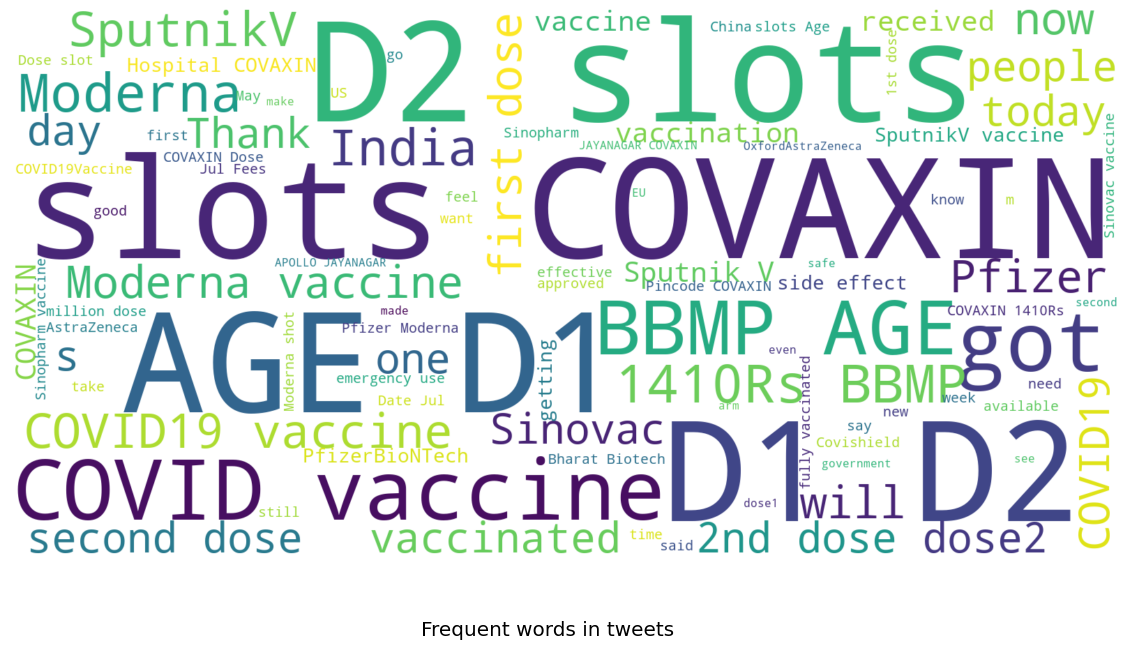

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(txt for txt in data)
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    
show_wordcloud(new_df['text'], title = "Frequent words in tweets")

In [46]:
# Analyzing sentiment using TextBlob
from textblob import TextBlob
new_df['polarity'] = new_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_df['subjectivity'] = new_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
new_df.head(10)

<ipython-input-46-8ebe11b5a488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['polarity'] = new_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-46-8ebe11b5a488>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['subjectivity'] = new_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


,user_location,user_followers,text,source,retweets,polarity,subjectivity
0,Jammu And Kashmir,13446,AIIMS to start trial of 2nd covaxin dose on ki...,Twitter Web App,0,-0.05,0.2
1,🇬🇧 via 🇧🇪 🇹🇷,25903,Side effects are rough. \n\n- No deep sleep \n...,Twitter for iPhone,0,-0.05,0.4
2,Other-Location Blocked,293,Understand the 'important' parts of the text☝️...,Twitter for Android,0,0.20,0.5
3,"Johannesburg, South Africa",64,Let's help ourselves understand how the vaccin...,Twitter for Android,0,0.00,0.0
4,Delhi,22470,And now Brazil has suspended the clinical tria...,Twitter for iPhone,12,0.00,0.0
5,Manc,218,the_BHA: Manchester 📢\n\nIf you require your ...,IFTTT,0,0.00,0.0
6,"Bangkok, Thailand",3,Chinese fans should ban Thai Artists who deval...,Twitter for iPhone,0,0.00,0.0
7,Manchester,1968,Manchester 📢\n\nIf you require your 1st or 2n...,Buffer,0,0.00,0.0
8,"Bengaluru, India",12,45+ #BBMP #Bengaluru #CovidVaccine Availabilit...,VaxBlr,0,0.40,0.8
9,"Bengaluru, India",12,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,VaxBlr,0,0.20,0.4


In [48]:
len(new_df)

143373

<ipython-input-50-3b34d415c91a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sentiment'] = np.select(criteria, values, 0)


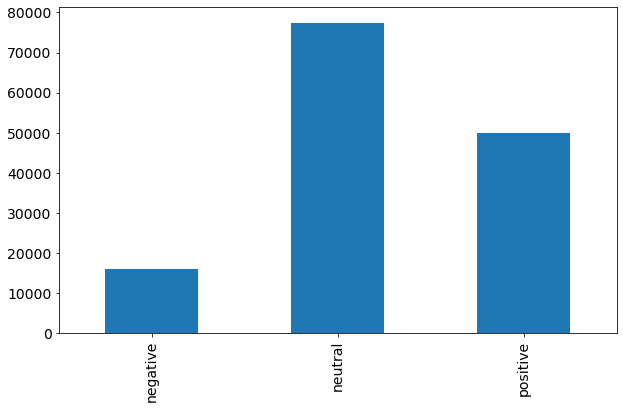

In [50]:
import numpy as np
criteria = [new_df['polarity'].between(-1, -0.01), new_df['polarity'].between(-0.01, 0.01), new_df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
new_df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
new_df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel='Sentiment Label'
plt.ylabel='Tweet Count'
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [51]:
new_df

,user_location,user_followers,text,source,retweets,polarity,subjectivity,sentiment
0,Jammu And Kashmir,13446,AIIMS to start trial of 2nd covaxin dose on ki...,Twitter Web App,0,-0.050000,0.2,negative
1,🇬🇧 via 🇧🇪 🇹🇷,25903,Side effects are rough. \n\n- No deep sleep \n...,Twitter for iPhone,0,-0.050000,0.4,negative
2,Other-Location Blocked,293,Understand the 'important' parts of the text☝️...,Twitter for Android,0,0.200000,0.5,positive
3,"Johannesburg, South Africa",64,Let's help ourselves understand how the vaccin...,Twitter for Android,0,0.000000,0.0,neutral
4,Delhi,22470,And now Brazil has suspended the clinical tria...,Twitter for iPhone,12,0.000000,0.0,neutral
...,...,...,...,...,...,...,...,...
145020,"Wales, United Kingdom",761,@mirekR9 @sputnikvaccine @AstraZeneca it's the...,Twitter Web App,0,0.000000,1.0,neutral
145021,USA🇺🇸,2035,FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...,Twitter Web App,0,0.000000,0.0,neutral
145022,Other-Location Blocked,14,#CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...,Twitter for iPhone,0,0.000000,0.0,neutral
145023,"London, England",66224,Trump announces #vaccine rollout 'in less than...,Twitter Web App,0,0.041667,0.2,positive


In [52]:
# drop the rows where the polarity is equal to 0.00
new_df.drop(new_df[new_df['polarity']== 0.00].index, inplace=True)

C:\Users\ntnkh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
new_df.sort_values(by=['polarity'], ascending = False)

,user_location,user_followers,text,source,retweets,polarity,subjectivity,sentiment
34603,USA,3446,She’s beautiful inside out!! #Vaccinated #Mode...,Twitter for iPhone,0,1.0,1.0,positive
126627,Other-Location Blocked,36,"Got my #Moderna shot today, it’s a wonderful f...",Twitter for iPhone,0,1.0,1.0,positive
73281,Other-Location Blocked,3,@McDonaldsCorp This is the best you can do to ...,Twitter for Android,0,1.0,0.3,positive
82780,"Toronto, Ontario",171,This cannot be news that we’ll need three dose...,Twitter for iPhone,0,1.0,0.3,positive
42834,Other-Location Blocked,1057,Best production yet at the @eicc Thank you @NH...,Twitter for Android,0,1.0,0.3,positive
...,...,...,...,...,...,...,...,...
114168,London,950,No words to describe how utterly disgusting th...,Twitter for Android,5,-1.0,1.0,negative
44288,Guwahati,16,Worst experience of vaccination in Sivasagar o...,Twitter for Android,0,-1.0,1.0,negative
85923,वसुधैव कुटुंबकम्,390,A shocking incident:\nRajasthan where 320 dose...,Twitter for Android,0,-1.0,1.0,negative
95882,Other-Location Blocked,150,This is awful. May she rest in peace and may h...,Twitter Web App,2,-1.0,1.0,negative


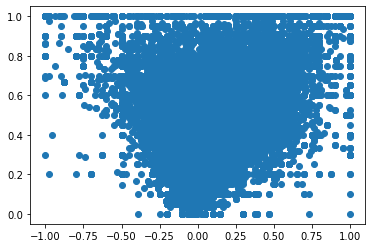

In [54]:
import matplotlib.pyplot as plt
x = list(new_df['polarity'])
y = list(new_df['subjectivity'])
plt.scatter(x,y) 
plt.xlabel = 'polarity'
plt.ylabel = 'subjectivity'
plt.show()

In [55]:
# From this graph, we see that the more positive, the more subjective a tweet can be

# Use regression and naive bayes to build  a predictive model 
##  create a binary column of polarity 0 for negative and 1 for positive
## a new data frame only contains text, polarity, binary_polarity, and clean_text

In [57]:
DF = new_df[['text', 'polarity']]
DF

,text,polarity
0,AIIMS to start trial of 2nd covaxin dose on ki...,-0.050000
1,Side effects are rough. \n\n- No deep sleep \n...,-0.050000
2,Understand the 'important' parts of the text☝️...,0.200000
8,45+ #BBMP #Bengaluru #CovidVaccine Availabilit...,0.400000
9,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,0.200000
...,...,...
145010,"@ZubyMusic 6 deaths so far. \nIt's only death,...",0.050000
145011,@sbnumb3 @nytimes Please don’t spread fake new...,-0.625000
145013,All respect to due process but why not give ap...,-0.083333
145019,@mirekR9 @sputnikvaccine @AstraZeneca check ou...,-0.125000


In [58]:
binary_polarity =[] #convert the polarity score to binary values
for value in DF['polarity'].values:
    if value > 0:
        binary_polarity.append(1)
    else:
        binary_polarity.append(0)

binary_polarity

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [61]:
DF["binary_polarity"]=binary_polarity # create a new column of binary values only
DF['binary_polarity'].value_counts(normalize=True)

<ipython-input-61-794a77e6b3b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["binary_polarity"]=binary_polarity # create a new column of binary values only


1    0.75535
0    0.24465
Name: binary_polarity, dtype: float64

In [62]:
DF

,text,polarity,binary_polarity
0,AIIMS to start trial of 2nd covaxin dose on ki...,-0.050000,0
1,Side effects are rough. \n\n- No deep sleep \n...,-0.050000,0
2,Understand the 'important' parts of the text☝️...,0.200000,1
8,45+ #BBMP #Bengaluru #CovidVaccine Availabilit...,0.400000,1
9,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,0.200000,1
...,...,...,...
145010,"@ZubyMusic 6 deaths so far. \nIt's only death,...",0.050000,1
145011,@sbnumb3 @nytimes Please don’t spread fake new...,-0.625000,0
145013,All respect to due process but why not give ap...,-0.083333,0
145019,@mirekR9 @sputnikvaccine @AstraZeneca check ou...,-0.125000,0


In [63]:
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
stopword_list = list(stopwords.words('english'))
stopword_list.extend(list(ENGLISH_STOP_WORDS))
nlp = spacy.load('en_core_web_lg')
pos_tags = ['ADJ','ADV','NOUN','VERB']
def preprocess(txt):
    txt = txt.lower() #normalize text
    txt = re.sub("https.+","", txt) # remove the links starting with https
    txt = re.sub(r'[^a-zA-Z]', " ", txt) # remove digits and puntuations
    doc = nlp(txt)
    words = [token.lemma_ for token in doc if token.pos_ in pos_tags and len(token.text)>2 and
            token.text not in stopword_list] # lemmatize the words
    return " ".join(words)

In [64]:
corpus = [preprocess(txt) for txt in DF['text'].values] #this will take approx 10 mins to run

In [65]:
DF['Clean Text'] = corpus
DF.head(5)

<ipython-input-65-fd3aa8fa954c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Clean Text'] = corpus


,text,polarity,binary_polarity,Clean Text
0,AIIMS to start trial of 2nd covaxin dose on ki...,-0.05,0,aiim start trial covaxin dose kid age year bha...
1,Side effects are rough. \n\n- No deep sleep \n...,-0.05,0,effect rough deep sleep radical tiredness head...
2,Understand the 'important' parts of the text☝️...,0.20,1,understand important part text brazilian globa...
8,45+ #BBMP #Bengaluru #CovidVaccine Availabilit...,0.40,1,bengaluru covidvaccine availability free slot ...
9,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,0.20,1,urban bengaluru covidvaccine availability free...


In [66]:
labels = list(DF['binary_polarity'])
labels[:5]

[0, 0, 1, 1, 1]

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

x_train, x_test, y_train, y_test = train_test_split(corpus, labels, stratify = labels, test_size = 0.3, random_state = 999)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_dtm = vectorizer.fit_transform(x_train)
x_test_dtm = vectorizer.transform(x_test)

# Naive Bayes

In [69]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

classifier = BernoulliNB()
classifier.fit(x_train_dtm, y_train)
predicted = classifier.predict(x_test_dtm)

In [70]:
print("Training accuracy: ", classifier.score(x_train_dtm, y_train))
print("Testing accuracy: ", classifier.score(x_test_dtm, y_test))

Training accuracy:  0.8788858707368603
Testing accuracy:  0.8413480885311871


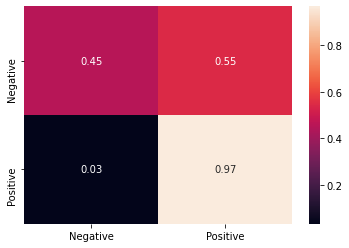

In [71]:
import seaborn as sns
labels = ['Negative', 'Positive']
sns.heatmap(confusion_matrix(y_test, predicted, normalize = 'true'), xticklabels = labels, yticklabels = labels,
           annot = True, fmt = '.2f')

In [73]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.45      0.58      4864
           1       0.85      0.97      0.90     15016

    accuracy                           0.84     19880
   macro avg       0.83      0.71      0.74     19880
weighted avg       0.84      0.84      0.82     19880



# Logistic Regression


In [96]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000, class_weight = 'balanced')
model.fit(x_train_dtm, y_train)
predicted_ = model.predict(x_test_dtm)

In [97]:
print("Training accuracy: ", model.score(x_train_dtm, y_train))
print("Testing accuracy: ", model.score(x_test_dtm, y_test))

Training accuracy:  0.9093476479972405
Testing accuracy:  0.8719315895372234


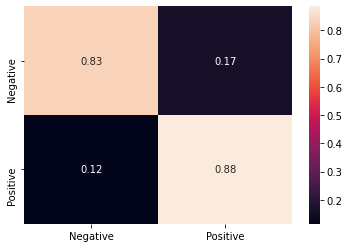

In [98]:
import seaborn as sns
labels = ['Negative', 'Positive']
sns.heatmap(confusion_matrix(y_test, predicted_, normalize = 'true'), xticklabels = labels, yticklabels = labels,
           annot = True, fmt = '.2f')

In [99]:
print(classification_report(y_test,predicted_))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      4864
           1       0.94      0.88      0.91     15016

    accuracy                           0.87     19880
   macro avg       0.82      0.86      0.84     19880
weighted avg       0.88      0.87      0.88     19880



## We will use Logistic Regression as it gives better accuracy (0.87 > 0.84)

# Text Explainer
## Use Eli5 and LIME

In [100]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [101]:
import eli5 as eli
eli.explain_weights(model, feature_names = vectorizer.get_feature_names())

Explanation(estimator="LogisticRegression(class_weight='balanced', max_iter=100000)", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='good', weight=8.892544937963248, std=None, value=None), FeatureWeight(feature='great', weight=8.047439252108813, std=None, value=None), FeatureWeight(feature='effective', weight=7.848799954062573, std=None, value=None), FeatureWeight(feature='free', weight=7.603206785360008, std=None, value=None), FeatureWeight(feature='new', weight=7.073996482192367, std=None, value=None), FeatureWeight(feature='well', weight=6.57660521093996, std=None, value=None), FeatureWeight(feature='happy', weight=6.274405420295672, std=None, value=None)], neg=[FeatureWeight(feature='bad', weight=-8.340936817501131, std=None, value=None), FeatureWeight(feature='usual', weight=-7.6885489202682855, std=None, value=None), FeatureWeight(feature='sick', weight=-7.221987155240646, std=None, value=None), FeatureWeight(feature='fake', weight=-6.452134160495371, std=None, value=None), FeatureWeight(feature='fail', weight=-6.31069808565173, std=None, value=None), FeatureWeight(feature='firm', weight=-6.280804207244443, std=None, value=None), FeatureWeight(feature='sec', weight=-6.248283315902971, std=None, value=None), FeatureWeight(feature='foreign', weight=-5.968440905235503, std=None, value=None), FeatureWeight(feature='fuck', weight=-5.7971912857748915, std=None, value=None), FeatureWeight(feature='hard', weight=-5.767643639451067, std=None, value=None), FeatureWeight(feature='wrong', weight=-5.7383791449574195, std=None, value=None), FeatureWeight(feature='poor', weight=-5.735377222677433, std=None, value=None), FeatureWeight(feature='cold', weight=-5.713141545387917, std=None, value=None)], pos_remaining=17708, neg_remaining=8594), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [102]:
# take one line of text in the dataset as an example
x_test[2]

'country young scrappy hungry throw shot dose'

In [103]:
y_test[2] #get the sentiment of this text

1

In [104]:
eli.show_prediction(model, x_test_dtm[2],
                   feature_names = vectorizer.get_feature_names(),
                   show_feature_values=True)

In [122]:
y_pred_prob = model.predict_proba(x_test_dtm)[:, 1]
c = make_pipeline(vectorizer, model)
mystring = list(x_test)[2]
print(c.predict_proba([mystring]))
class_names = ["Negative", "Positive"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba,num_features=10)
exp.as_list()

[[0.09963301 0.90036699]]


[('young', 0.217386324629342),
 ('shot', 0.08866845901126968),
 ('dose', 0.07413659326023075),
 ('throw', -0.06071067008330941),
 ('country', -0.04487919664562293),
 ('hungry', -0.019671917589007753),
 ('scrappy', 0.0006631681323306028)]

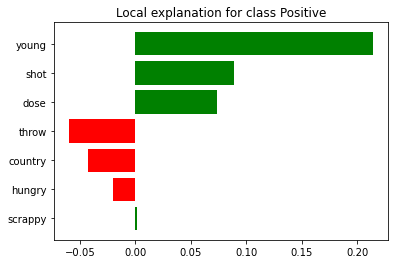

In [108]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [123]:
exp.show_in_notebook(text=False)

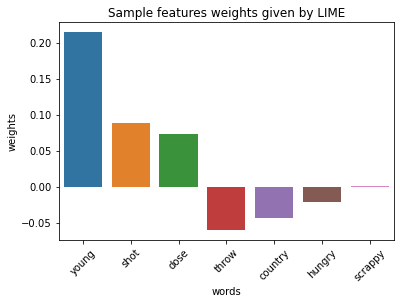

In [110]:
from collections import OrderedDict
import matplotlib.pyplot as plt
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})

sns.barplot(x = "words", y = "weights", data = lime_weights)
plt.xticks(rotation = 45)
plt.title("Sample features weights given by LIME")
plt.show()

In [111]:
from eli5.lime import TextExplainer
te = TextExplainer(random_state = 42)
te.fit(mystring, c.predict_proba)
te.show_prediction(target_names=class_names)

In [112]:
# take another line as an example
x_test[8]

'death receive covid jab coronavac'

In [113]:
y_test[8]

1

In [114]:
eli.show_prediction(model, x_test_dtm[8],
                   feature_names = vectorizer.get_feature_names(),
                   show_feature_values=True)

In [120]:
y_pred_prob = model.predict_proba(x_test_dtm)[:, 1]
c = make_pipeline(vectorizer, model)
mystring = list(x_test)[8]
print(c.predict_proba([mystring]))
class_names = ["Negative", "Positive"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba,num_features=10)
exp.as_list()

[[0.19889339 0.80110661]]


[('jab', 0.16187043829864156),
 ('receive', 0.10431122394355209),
 ('coronavac', -0.07646246435385912),
 ('death', -0.06303120407672735),
 ('covid', 0.05000389436490193)]

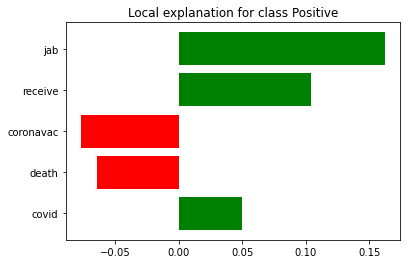

In [116]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [121]:
exp.show_in_notebook(text=False)

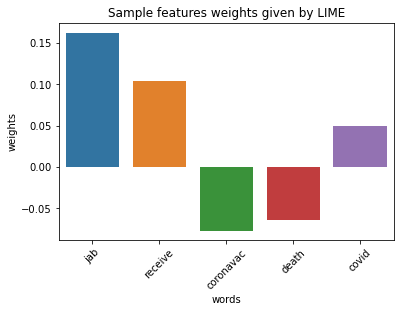

In [118]:
from collections import OrderedDict
import matplotlib.pyplot as plt
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})

sns.barplot(x = "words", y = "weights", data = lime_weights)
plt.xticks(rotation = 45)
plt.title("Sample features weights given by LIME")
plt.show()

In [119]:
from eli5.lime import TextExplainer
te = TextExplainer(random_state = 42)
te.fit(mystring, c.predict_proba)
te.show_prediction(target_names=class_names)